In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

In [ ]:
# Kaggle Kernel-dependent
input_path = "/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/"

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
    'test':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train': 
    datasets.ImageFolder(input_path + 'train', data_transforms['train']),
    'validation': 
    datasets.ImageFolder(input_path + 'validation', data_transforms['validation']),
    'test': 
    datasets.ImageFolder(input_path + 'test', data_transforms['test'])
}

dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=32,
                                shuffle=True,
                                num_workers=0),  
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0),  
    'test':
    torch.utils.data.DataLoader(image_datasets['test'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0)  
}

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
model = models.resnet50(pretrained=True).to(device)
    
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [ ]:
def train_model(model, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))
    return model

In [ ]:
model_trained = train_model(model, criterion, optimizer, num_epochs=30)

Epoch 1/3
----------
train loss: 0.5335, acc: 0.7325
validation loss: 0.6661, acc: 0.6143
Epoch 2/3
----------
train loss: 0.4209, acc: 0.8151
validation loss: 0.7229, acc: 0.6238
Epoch 3/3
----------
train loss: 0.4134, acc: 0.8021
validation loss: 0.7809, acc: 0.6214


In [ ]:

!mkdir models
!mkdir models/pytorch

In [ ]:
torch.save(model_trained.state_dict(), '/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/models/weights.h5')

In [ ]:
model = models.resnet101(weights=None).to(device)
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/models/weights.h5'), strict=False)

_IncompatibleKeys(missing_keys=['layer3.6.conv1.weight', 'layer3.6.bn1.weight', 'layer3.6.bn1.bias', 'layer3.6.bn1.running_mean', 'layer3.6.bn1.running_var', 'layer3.6.conv2.weight', 'layer3.6.bn2.weight', 'layer3.6.bn2.bias', 'layer3.6.bn2.running_mean', 'layer3.6.bn2.running_var', 'layer3.6.conv3.weight', 'layer3.6.bn3.weight', 'layer3.6.bn3.bias', 'layer3.6.bn3.running_mean', 'layer3.6.bn3.running_var', 'layer3.7.conv1.weight', 'layer3.7.bn1.weight', 'layer3.7.bn1.bias', 'layer3.7.bn1.running_mean', 'layer3.7.bn1.running_var', 'layer3.7.conv2.weight', 'layer3.7.bn2.weight', 'layer3.7.bn2.bias', 'layer3.7.bn2.running_mean', 'layer3.7.bn2.running_var', 'layer3.7.conv3.weight', 'layer3.7.bn3.weight', 'layer3.7.bn3.bias', 'layer3.7.bn3.running_mean', 'layer3.7.bn3.running_var', 'layer3.8.conv1.weight', 'layer3.8.bn1.weight', 'layer3.8.bn1.bias', 'layer3.8.bn1.running_mean', 'layer3.8.bn1.running_var', 'layer3.8.conv2.weight', 'layer3.8.bn2.weight', 'layer3.8.bn2.bias', 'layer3.8.bn2.run

In [ ]:
test_mon= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test/Monkeypox")
print(test_mon)
test_oth= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test/Others")
print(test_oth)
classes = os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/Fold1/Fold1/Fold1/test")
print(classes)

['M43_02.jpg', 'M40_02.jpg', 'M39_01.jpg', 'M40_03.jpg', 'M19_01.jpg', 'M45_01.jpg', 'M48_01.jpg', 'M38_02.jpg', 'M43_03.jpg', 'M39_02.jpg', 'M48_02.jpg', 'M43_01.jpg', 'M04_01.jpg', 'M40_01.jpg', 'M38_01.jpg', 'M23_01.jpg', 'M19_02.jpg', 'M51_02.jpg', 'M51_01.jpg', 'M48_03.jpg']
['NM67_01.jpg', 'NM54_02.jpg', 'NM101_01.jpg', 'NM58_02.jpg', 'NM54_01.jpg', 'NM79_01.jpg', 'NM41_02.jpg', 'NM14_01.jpg', 'NM101_02.jpg', 'NM19_01.jpg', 'NM41_01.jpg', 'NM80_01.jpg', 'NM58_01.jpg', 'NM12_01.jpg', 'NM10_01.jpg', 'NM23_01.jpg', 'NM52_01.jpg', 'NM35_01.jpg', 'NM02_01.jpg', 'NM17_01.jpg', 'NM71_01.jpg', 'NM72_01.jpg', 'NM31_01.jpg', 'NM36_01.jpg', 'NM85_01.jpg']
['Monkeypox', 'Others']


In [ ]:
mon_list = [Image.open(input_path +"test/" +classes[0]+"/" + img_path) for img_path in test_mon]
oth_list = [Image.open(input_path +"test/"+ classes[1]+"/" +img_path) for img_path in test_oth]


In [ ]:
validation_batch1 = torch.stack([data_transforms['test'](img).to(device)
                                for img in mon_list])
validation_batch2 = torch.stack([data_transforms['test'](img).to(device)
                                for img in oth_list])

In [ ]:
pred_logits_tensor = model(validation_batch1)
pred_logits_tensor


tensor([[-0.3165,  0.1722],
        [-0.2800, -0.0217],
        [-0.2418,  0.0196],
        [-0.2857, -0.1330],
        [-0.2698,  0.0509],
        [-0.2402, -0.0162],
        [-0.3536,  0.0994],
        [-0.2540,  0.1958],
        [-0.2461, -0.0241],
        [-0.1736, -0.0319],
        [-0.3427, -0.0018],
        [-0.2360,  0.0641],
        [-0.2357, -0.0271],
        [-0.1752, -0.0453],
        [-0.3099,  0.1497],
        [-0.2425, -0.0024],
        [-0.2255, -0.1065],
        [-0.2993,  0.0141],
        [-0.2827, -0.0075],
        [-0.4223,  0.1081]], grad_fn=<AddmmBackward0>)

In [ ]:
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()
pred_probs

array([[0.38021606, 0.61978394],
       [0.4357706 , 0.5642294 ],
       [0.43500486, 0.5649951 ],
       [0.46190915, 0.5380909 ],
       [0.42049512, 0.5795049 ],
       [0.44421867, 0.5557813 ],
       [0.38864928, 0.6113507 ],
       [0.38941365, 0.61058635],
       [0.44473565, 0.5552643 ],
       [0.4646553 , 0.5353447 ],
       [0.41557872, 0.5844213 ],
       [0.4255339 , 0.5744661 ],
       [0.448031  , 0.551969  ],
       [0.46755484, 0.5324452 ],
       [0.38708022, 0.6129197 ],
       [0.44027433, 0.55972564],
       [0.4702806 , 0.52971935],
       [0.4223027 , 0.5776973 ],
       [0.4316409 , 0.5683591 ],
       [0.37041822, 0.62958175]], dtype=float32)

In [ ]:
pred_logits_tensor2 = model(validation_batch2)
pred_logits_tensor2


tensor([[-3.4704e-01, -1.3132e-01],
        [-3.1679e-01, -5.7226e-02],
        [-1.4193e-01, -5.2519e-02],
        [-2.7022e-01,  6.8304e-02],
        [-4.2195e-01, -2.4241e-02],
        [-2.3094e-01,  1.2521e-01],
        [-2.3141e-01,  1.3958e-01],
        [-3.4353e-01,  1.1410e-01],
        [-2.6082e-01, -6.2782e-02],
        [-2.6214e-01, -2.0580e-02],
        [-1.7607e-01,  1.9949e-03],
        [-2.5910e-01, -7.1787e-02],
        [-3.6863e-01,  3.0883e-04],
        [-2.3135e-01,  6.5564e-02],
        [-1.3664e-01, -5.9950e-02],
        [-2.7950e-01,  1.2146e-02],
        [-2.8624e-01, -2.5356e-02],
        [-1.0476e-01,  2.4203e-02],
        [-3.7504e-01,  1.4220e-01],
        [-2.6132e-01, -6.7410e-02],
        [-2.9599e-01,  8.8111e-02],
        [-2.4413e-01,  9.9624e-03],
        [-4.1569e-01,  1.4619e-01],
        [-2.5667e-01, -1.3493e-02],
        [-1.8580e-01, -1.1732e-02]], grad_fn=<AddmmBackward0>)

In [ ]:
pred_probs2 = F.softmax(pred_logits_tensor2, dim=1).cpu().data.numpy()
pred_probs2

array([[0.44627926, 0.5537208 ],
       [0.4354717 , 0.56452835],
       [0.47766182, 0.52233815],
       [0.41616738, 0.5838327 ],
       [0.40186208, 0.5981379 ],
       [0.41189215, 0.5881078 ],
       [0.4083008 , 0.5916992 ],
       [0.38755026, 0.6124497 ],
       [0.45065293, 0.5493471 ],
       [0.43990186, 0.56009805],
       [0.45560196, 0.544398  ],
       [0.45330903, 0.54669094],
       [0.40879634, 0.5912037 ],
       [0.42631283, 0.57368714],
       [0.48083684, 0.51916313],
       [0.42760137, 0.57239866],
       [0.43514553, 0.5648545 ],
       [0.4678047 , 0.53219527],
       [0.37349772, 0.6265023 ],
       [0.45167276, 0.54832727],
       [0.40513873, 0.59486127],
       [0.43681645, 0.5631835 ],
       [0.36311156, 0.63688844],
       [0.43950394, 0.56049603],
       [0.45659167, 0.5434084 ]], dtype=float32)

44.627925753593445 55.372077226638794
43.54717135429382 56.452834606170654
47.76618182659149 52.23381519317627
41.616737842559814 58.38326811790466
40.18620848655701 59.81379151344299
41.18921458721161 58.81078243255615
40.83007872104645 59.16991829872131
38.75502645969391 61.24497056007385
45.065292716026306 54.93471026420593
43.99018585681915 56.00980520248413
45.56019604206085 54.43980097770691
45.3309029340744 54.66909408569336
40.87963402271271 59.12036895751953
42.63128340244293 57.36871361732483
48.08368384838104 51.91631317138672
42.76013672351837 57.23986625671387
43.51455271244049 56.48545026779175
46.78047001361847 53.21952700614929
37.349772453308105 62.650227546691895
45.167276263237 54.83272671699524


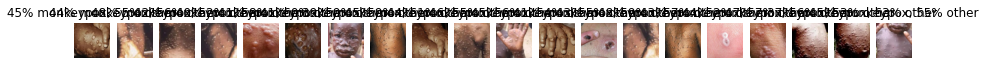

In [ ]:
fig, axs = plt.subplots(1, len(mon_list), figsize=(15, 10))
for i, img in enumerate(mon_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% monkeypox, {:.0f}% other".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)
    print(100*pred_probs[i,0],100*pred_probs[i,1])

44.627925753593445 55.372077226638794
43.54717135429382 56.452834606170654
47.76618182659149 52.23381519317627
41.616737842559814 58.38326811790466
40.18620848655701 59.81379151344299
41.18921458721161 58.81078243255615
40.83007872104645 59.16991829872131
38.75502645969391 61.24497056007385
45.065292716026306 54.93471026420593
43.99018585681915 56.00980520248413
45.56019604206085 54.43980097770691
45.3309029340744 54.66909408569336
40.87963402271271 59.12036895751953
42.63128340244293 57.36871361732483
48.08368384838104 51.91631317138672
42.76013672351837 57.23986625671387
43.51455271244049 56.48545026779175
46.78047001361847 53.21952700614929
37.349772453308105 62.650227546691895
45.167276263237 54.83272671699524
40.51387310028076 59.48612689971924
43.68164539337158 56.31834864616394
36.311155557632446 63.688844442367554
43.9503937959671 56.04960322380066
45.65916657447815 54.34083938598633


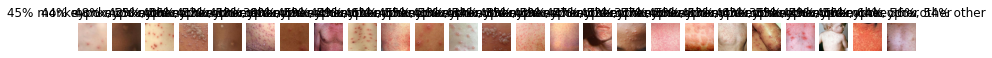

In [ ]:
fig, axs = plt.subplots(1, len(oth_list), figsize=(15, 10))
for i, img in enumerate(oth_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% monkeypox, {:.0f}% other".format(100*pred_probs2[i,0],
                                                            100*pred_probs2[i,1]))
    ax.imshow(img)
    print(100*pred_probs2[i,0],100*pred_probs2[i,1])